```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# {index}`Dynamics in One Dimension <single: Dynamics in One Dimension>`

```{contents} Contents
:depth: 2
```

## Overview

In this lecture we give a quick introduction to discrete time dynamics in one
dimension.

In one-dimensional models, the state of the system is described by a single variable.

Although most interesting dynamic models have two or more state variables, the
one-dimensional setting is a good place to learn the foundations of dynamics and build
intuition.

Let's start with some standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np

## Some Definitions

This section sets out the objects of interest and the kinds of properties we study.

### Difference Equations

A **time homogeneous first order difference equation** is an equation of the
form

```{math}
:label: sdsod

x_{t+1} = g(x_t)
```

where $g$ is a function from some subset $S$ of $\mathbb R$ to itself.

Here $S$ is called the **state space** and $x$ is called the **state variable**.

In the definition,

* time homogeneity means that $g$ is the same at each time $t$
* first order means dependence on only one lag (i.e., earlier states such as $x_{t-1}$ do not enter into {eq}`sdsod`).

If $x_0 \in S$ is given, then {eq}`sdsod` recursively defines the sequence

```{math}
:label: sdstraj

x_0, \quad
x_1 = g(x_0), \quad
x_2 = g(x_1) = g(g(x_0)), \quad \text{etc.}
```

This sequence is called the **trajectory** of $x_0$ under $g$.

If we define $g^n$ to be $n$ compositions of $g$ with itself, then we can write the trajectory more simply as $x_t = g^t(x_0)$ for $t \geq 0$.

### Example: A Linear Model

One simple example is the **linear difference equation**

$$
x_{t+1} = a x_t + b, \qquad S = \mathbb R
$$

where $a, b$ are fixed constants.

In this case, given $x_0$, the trajectory {eq}`sdstraj` is

```{math}
:label: sdslinmodpath

x_0, \quad
a x_0 + b, \quad
a^2 x_0 + a b + b, \quad \text{etc.}
```

Continuing in this way, and using our knowledge of {doc}`geometric series <geom_series>`, we find that, for any $t \geq 0$,

```{math}
:label: sdslinmod

x_t = a^t x_0 + b \frac{1 - a^t}{1 - a}
```

This is about all we need to know about the linear model.

We have an exact expression for $x_t$ for all $t$ and hence a full
understanding of the dynamics.

Notice in particular that $|a| < 1$, then, by {eq}`sdslinmod`, we have

```{math}
:label: sdslinmodc

x_t \to  \frac{b}{1 - a} \text{ as } t \to \infty
```

regardless of $x_0$

This is an example of what is called global stability, a topic we return to
below.

### Example: A Nonlinear Model

In the linear example above, we obtained an exact analytical expression for $x_t$
in terms of arbitrary $t$ and $x_0$.

This made analysis of dynamics very easy.

When models are nonlinear, however, the situation can be quite different.

For example, recall how we [previously studied](https://python-programming.quantecon.org/python_oop.html#example-the-solow-growth-model) the law of motion for the Solow growth model, a simplified version of which is

```{math}
:label: solow_lom2

k_{t+1} = s z k_t^{\alpha} + (1 - \delta) k_t
```

Here $k$ is capital stock and $s, z, \alpha, \delta$ are positive
parameters with $0 < \alpha, \delta < 1$.

If you try to iterate like we did in {eq}`sdslinmodpath`, you will find that
the algebra gets messy quickly.

Analyzing the dynamics of this model requires a different method (see below).

### Stability

A **steady state** of the difference equation $x_{t+1} = g(x_t)$ is a
point $x^*$ in $S$ such that $x^* = g(x^*)$.

In other words, $x^*$ is a **fixed point** of the function $g$ in
$S$.

For example, for the linear model $x_{t+1} = a x_t + b$, you can use the
definition to check that

* $x^* := b/(1-a)$ is a steady state whenever $a \not= 1$.
* if $a = 1$ and $b=0$, then every $x \in \mathbb R$ is a
  steady state.
* if $a = 1$ and $b \not= 0$, then the linear model has no steady
  state in $\mathbb R$.

A steady state $x^*$ of $x_{t+1} = g(x_t)$ is called
**globally stable** if, for all $x_0 \in S$,

$$
x_t = g^t(x_0) \to x^* \text{ as } t \to \infty
$$

For example, in the linear model $x_{t+1} = a x_t + b$ with $a
\not= 1$, the steady state $x^*$

* is globally stable if $|a| < 1$ and
* fails to be globally stable otherwise.

This follows directly from {eq}`sdslinmod`.

A steady state $x^*$ of $x_{t+1} = g(x_t)$ is called
**locally stable** if there exists an $\epsilon > 0$ such that

$$
| x_0 - x^* | < \epsilon
\; \implies \;
x_t = g^t(x_0) \to x^* \text{ as } t \to \infty
$$

Obviously every globally stable steady state is also locally stable.

We will see examples below where the converse is not true.

## Graphical Analysis

As we saw above, analyzing the dynamics for nonlinear models is nontrivial.

There is no single way to tackle all nonlinear models.

However, there is one technique for one-dimensional models that provides a
great deal of intuition.

This is a graphical approach based on **45 degree diagrams**.

Let's look at an example: the Solow model with dynamics given in {eq}`solow_lom2`.

We begin with some plotting code that you can ignore at first reading.

The function of the code is to produce 45 degree diagrams and time series
plots.

In [2]:
def subplots(fs):
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots(figsize=fs)

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax


def plot45(g, xmin, xmax, x0, num_arrows=6, var='x'):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots((6.5, 6))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw,
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='g')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args)
            ax.plot((x, x), (0, x), 'k', ls='dotted')

        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i)))

        x = g(x)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
        ax.plot((x, x), (0, x), 'k-', ls='dotted')

    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show()

def ts_plot(g, xmin, xmax, x0, ts_length=6, var='x'):
    fig, ax = subplots((7, 5.5))
    ax.set_ylim(xmin, xmax)
    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'${}_t$'.format(var), fontsize=14)
    x = np.empty(ts_length)
    x[0] = x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    ax.plot(range(ts_length),
            x,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'${}_t$'.format(var))
    ax.legend(loc='best', fontsize=14)
    ax.set_xticks(range(ts_length))
    plt.show()

Let's create a 45 degree diagram for the Solow model with a fixed set of
parameters

In [3]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4

Here's the update function corresponding to the model.

In [4]:
def g(k):
    return A * s * k**alpha + (1 - delta) * k

Here is the 45 degree plot.

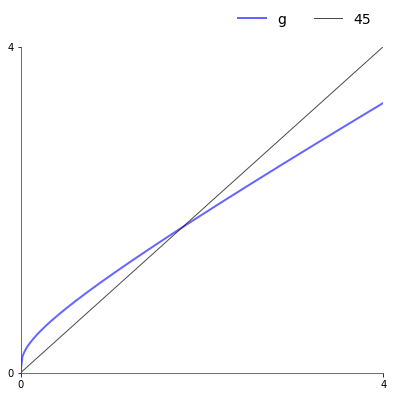

In [5]:
xmin, xmax = 0, 4  # Suitable plotting region.

plot45(g, xmin, xmax, 0, num_arrows=0)

The plot shows the function $g$ and the 45 degree line.

Think of $k_t$ as a value on the horizontal axis.

To calculate $k_{t+1}$, we can use the graph of $g$ to see its
value on the vertical axis.

Clearly,

* If $g$ lies above the 45 degree line at this point, then we have $k_{t+1} > k_t$.
* If $g$ lies below the 45 degree line at this point, then we have $k_{t+1} < k_t$.
* If $g$ hits the 45 degree line at this point, then we have $k_{t+1} = k_t$, so $k_t$ is a steady state.

For the Solow model, there are two steady states when $S = \mathbb R_+ =
[0, \infty)$.

* the origin $k=0$
* the unique positive number such that $k = s z k^{\alpha} + (1 - \delta) k$.

By using some algebra, we can show that in the second case, the steady state is

$$
k^* = \left( \frac{sz}{\delta} \right)^{1/(1-\alpha)}
$$

### Trajectories

By the preceding discussion, in regions where $g$ lies above the 45 degree line, we know that the trajectory is increasing.

The next figure traces out a trajectory in such a region so we can see this more clearly.

The initial condition is $k_0 = 0.25$.

/tmp/ipykernel_14166/2261905364.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot((x, x), (0, x), 'k-', ls='dotted')


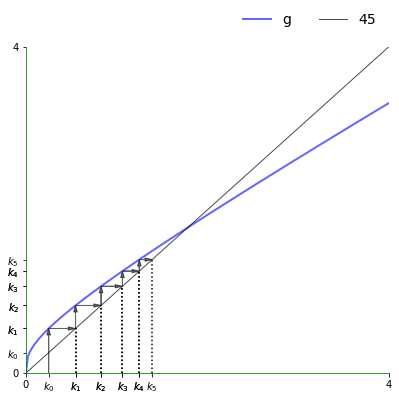

In [6]:
k0 = 0.25

plot45(g, xmin, xmax, k0, num_arrows=5, var='k')

We can plot the time series of capital corresponding to the figure above as
follows:

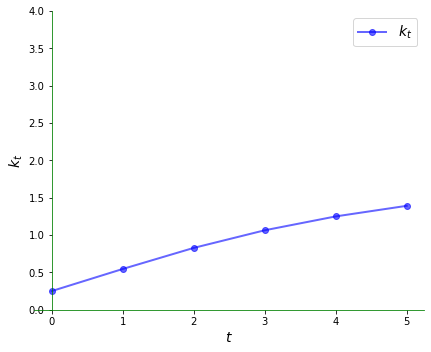

In [7]:
ts_plot(g, xmin, xmax, k0, var='k')

Here's a somewhat longer view:

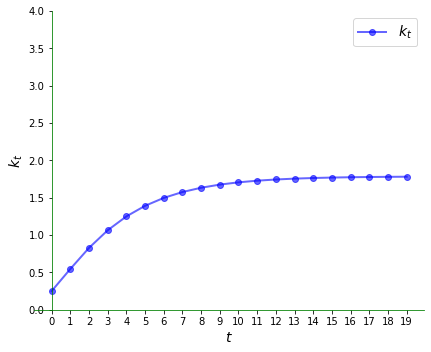

In [8]:
ts_plot(g, xmin, xmax, k0, ts_length=20, var='k')

When capital stock is higher than the unique positive steady state, we see that
it declines:

/tmp/ipykernel_14166/2261905364.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot((x, x), (0, x), 'k-', ls='dotted')


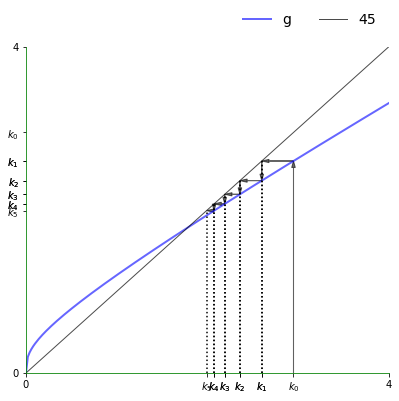

In [9]:
k0 = 2.95

plot45(g, xmin, xmax, k0, num_arrows=5, var='k')

Here is the time series:

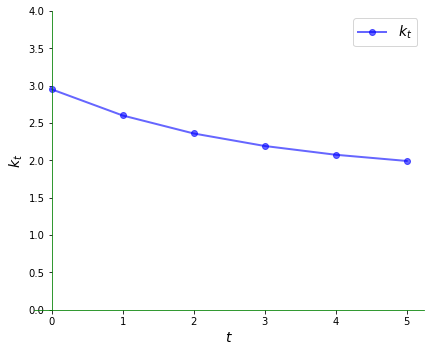

In [10]:
ts_plot(g, xmin, xmax, k0, var='k')

### Complex Dynamics

The Solow model is nonlinear but still generates very regular dynamics.

One model that generates irregular dynamics is the **quadratic map**

$$
g(x) = 4 x (1 - x),
\qquad x \in [0, 1]
$$

Let's have a look at the 45 degree diagram.

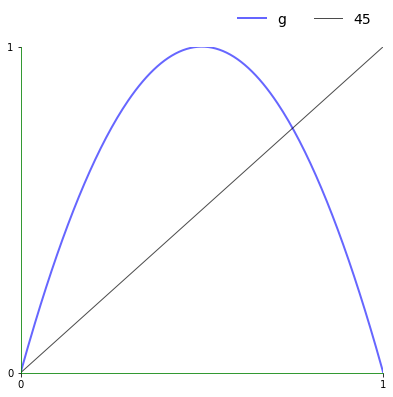

In [11]:
xmin, xmax = 0, 1
g = lambda x: 4 * x * (1 - x)

x0 = 0.3
plot45(g, xmin, xmax, x0, num_arrows=0)

Now let's look at a typical trajectory.

/tmp/ipykernel_14166/2261905364.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot((x, x), (0, x), 'k-', ls='dotted')


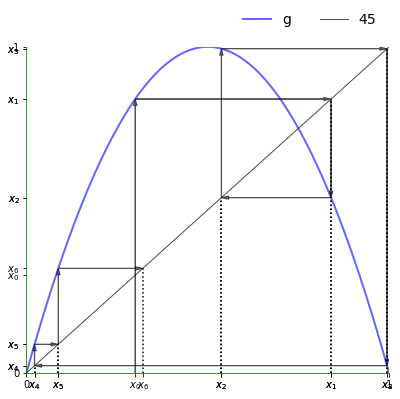

In [12]:
plot45(g, xmin, xmax, x0, num_arrows=6)

Notice how irregular it is.

Here is the corresponding time series plot.

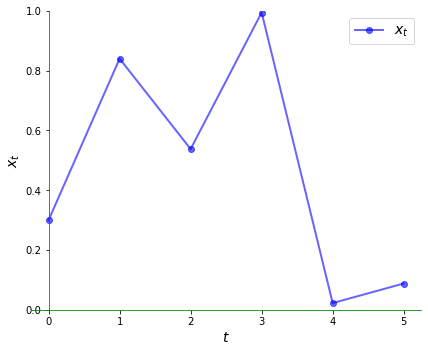

In [13]:
ts_plot(g, xmin, xmax, x0, ts_length=6)

The irregularity is even clearer over a longer time horizon:

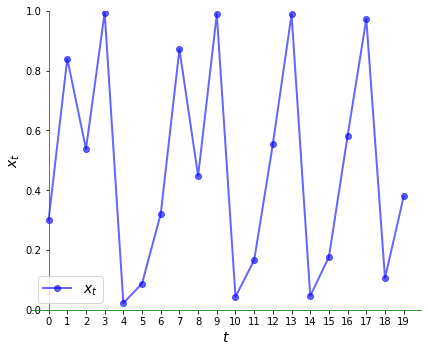

In [14]:
ts_plot(g, xmin, xmax, x0, ts_length=20)

## Exercises

### Exercise 1
```{exercise}
:label: sd_ex1

Consider again the linear model $x_{t+1} = a x_t + b$ with $a
\not=1$.

The unique steady state is $b / (1 - a)$.

The steady state is globally stable if $|a| < 1$.

Try to illustrate this graphically by looking at a range of initial conditions.

What differences do you notice in the cases $a \in (-1, 0)$ and $a
\in (0, 1)$?

Use $a=0.5$ and then $a=-0.5$ and study the trajectories

Set $b=1$ throughout.
```

## Solutions

```{solution-start} sd_ex1
:class: dropdown
```

We will start with the case $a=0.5$.

Let's set up the model and plotting region:

In [15]:
a, b = 0.5, 1
xmin, xmax = -1, 3
g = lambda x: a * x + b

Now let's plot a trajectory:

/tmp/ipykernel_14166/2261905364.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot((x, x), (0, x), 'k-', ls='dotted')


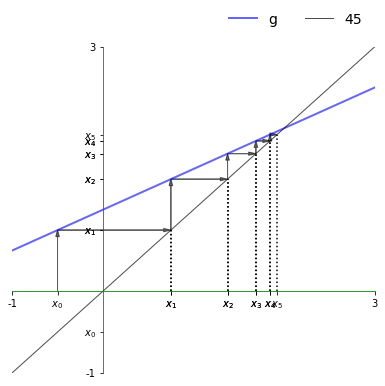

In [16]:
x0 = -0.5
plot45(g, xmin, xmax, x0, num_arrows=5)

Here is the corresponding time series, which converges towards the steady
state.

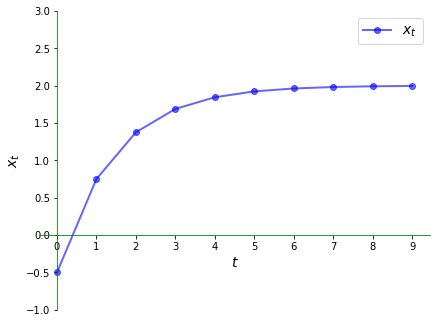

In [17]:
ts_plot(g, xmin, xmax, x0, ts_length=10)

Now let's try $a=-0.5$ and see what differences we observe.

Let's set up the model and plotting region:

In [18]:
a, b = -0.5, 1
xmin, xmax = -1, 3
g = lambda x: a * x + b

Now let's plot a trajectory:

/tmp/ipykernel_14166/2261905364.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot((x, x), (0, x), 'k-', ls='dotted')


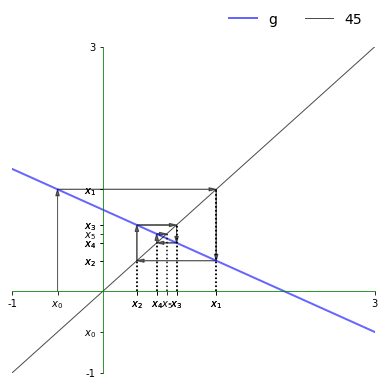

In [19]:
x0 = -0.5
plot45(g, xmin, xmax, x0, num_arrows=5)

Here is the corresponding time series, which converges towards the steady
state.

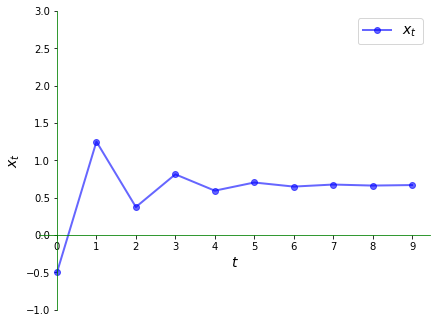

In [20]:
ts_plot(g, xmin, xmax, x0, ts_length=10)

Once again, we have convergence to the steady state but the nature of
convergence differs.

In particular, the time series jumps from above the steady state to below it
and back again.

In the current context, the series is said to exhibit **damped oscillations**.

```{solution-end}
```